In [2]:
import matplotlib.pyplot as plt
import torch
import sys
import os
import yaml
sys.path.append(os.path.abspath(os.path.join('..', '..')))

# custom imports
from src.utils import load_config, load_model
import src.graphs_generation as graphs_gen

# feature extraction imports
from torchvision.models.feature_extraction import (
    create_feature_extractor,
    get_graph_node_names,
)

# Function to visualize the features:

In [3]:
def visualize_features(model_name):

    # NOTE:
    # - differently from the main script, the trained model is not provided, but only the name
    # - the .pth file of the requested model has to be in the "saved_models" folder for the function to work 

    # -----------------------------------------------------
    # # Uncomment this to visualize the names of the nodes in the graph (also print model to see the names of the nodes):
    # names = get_graph_node_names(model)
    # print(names)

    # Reading the configuration file:
    config_file_path = os.path.join('..', '..','docs','final_nndl_longexp_config.yml')
    global_config = load_config(config_file_path)
    
    # - Define the device:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Device: {device}")    

    #  generate single graph with clique (70% of graph size, can be modified)
    graph = graphs_gen.generate_batch(
        1, global_config["graph_size"], [int(0.7 * global_config["graph_size"])], global_config["p_correction_type"], p_clique=1
    )[0]
    graph = graph.to(device)

    # Defining layers to extract features from:
    # - CNN features:
    if "CNN" in model_name:
        # differentiating CNN versions:
        if "1" in model_name:
            # Loading the correct model configuration:
            if "small" in model_name:
                model_config = global_config["models"][1]
            if "large" in model_name:
                model_config = global_config["models"][3] 
            if "medium" in model_name:
                model_config = global_config["models"][5]     
            # Loading model based on name:
            model = load_model(model_config, global_config["graph_size"], device)
            # Loading the model state dict:
            if not torch.cuda.is_available():
                model.load_state_dict(torch.load(os.path.join('saved_models', model_name, model_name+f'_N{global_config["graph_size"]}_trained.pth'), map_location=torch.device('cpu')))
            else:
                model.load_state_dict(torch.load(os.path.join('saved_models', model_name, model_name+f'_N{global_config["graph_size"]}_trained.pth')))      
            # creating features extractor with relevant node names:
            model = create_feature_extractor(
                model,
                {
                    "model.0.0": "feat1",
                    "model.1.0": "feat2",
                    "model.2.0": "feat3",
                },
            )
        elif "2" in model_name:
            # Loading the correct model configuration:
            if "small" in model_name:
                model_config = global_config["models"][2]
            if "large" in model_name:
                model_config = global_config["models"][4] 
            if "medium" in model_name:
                model_config = global_config["models"][6]     
            # Loading model based on name:
            model = load_model(model_config, global_config["graph_size"], device)
            # Loading the model state dict:
            if not torch.cuda.is_available():
                model.load_state_dict(torch.load(os.path.join('saved_models', model_name, model_name+f'_N{global_config["graph_size"]}_trained.pth'), map_location=torch.device('cpu')))
            else:
                model.load_state_dict(torch.load(os.path.join('saved_models', model_name, model_name+f'_N{global_config["graph_size"]}_trained.pth')))
            # creating features extractor with relevant node names:
            model = create_feature_extractor(
                model,
                {
                    "model.0.0": "feat1",
                    "model.1.0": "feat2",
                    "model.2.0": "feat3",
                    "model.3.0": "feat4",
                },
            )
        elif "rudy" in model_name:
            # Loading model configuration:
            model_config = global_config["models"][7]
            # Loading model based on name:
            model = load_model(model_config, global_config["graph_size"], device)
            # Loading the model state dict:
            if not torch.cuda.is_available():
                model.load_state_dict(torch.load(os.path.join('saved_models', model_name, model_name+f'_N{global_config["graph_size"]}_trained.pth'), map_location=torch.device('cpu')))
            else:
                model.load_state_dict(torch.load(os.path.join('saved_models', model_name, model_name+f'_N{global_config["graph_size"]}_trained.pth')))            # creating features extractor with relevant node names:
            model = create_feature_extractor(
                model,
                {
                    "model.1.0": "feat1",
                    "model.4.conv1": "feat_res_1_1",
                    "model.4.conv2": "feat_res_1_2",
                    "model.5.0": "feat2",
                    "model.8.conv1": "feat_res_2_1",
                    "model.8.conv2": "feat_res_2_2",
                    "model.9.0": "feat3",
                },
            )
        else:
            raise ValueError("CNN Model not found. Model name might be incorrect.")

    # - VGG features:
    elif "VGG16" in model_name:
        # Loading correct model configuration:
        if "scratch" in model_name:
            model_config = global_config["models"][8]
        elif "pretrained" in model_name:
            model_config = global_config["models"][9]
        # Loading model based on name:
        model = load_model(model_config, global_config["graph_size"], device)        
        # Loading the model state dict:
        if not torch.cuda.is_available():
            model.load_state_dict(torch.load(os.path.join('saved_models', model_name, model_name+f'_N{global_config["graph_size"]}_trained.pth'), map_location=torch.device('cpu')))
        else:
            model.load_state_dict(torch.load(os.path.join('saved_models', model_name, model_name+f'_N{global_config["graph_size"]}_trained.pth')))                    
        # creating features extractor with relevant node names:
        model = create_feature_extractor(
            model,
            {
                "model.features.2": "conv2",
                "model.features.7": "conv4",
                "model.features.12": "conv6",
                "model.features.17": "conv8",
                "model.features.21": "conv10",
                "model.features.26": "conv12",
                "model.features.28": "conv15",
            },
        )

    # - ResNet features:
    elif "ResNet50" in model_name:
        # Loading correct model configuration:
        if "scratch" in model_name:
            model_config = global_config["models"][10]
        elif "pretrained" in model_name:
            model_config = global_config["models"][11]        
        # Loading model based on name:
        model = load_model(model_config, global_config["graph_size"], device)          
        # Loading the model state dict:
        if not torch.cuda.is_available():
            model.load_state_dict(torch.load(os.path.join('saved_models', model_name, model_name+f'_N{global_config["graph_size"]}_trained.pth'), map_location=torch.device('cpu')))
        else:
            model.load_state_dict(torch.load(os.path.join('saved_models', model_name, model_name+f'_N{global_config["graph_size"]}_trained.pth')))
        # creating features extractor with relevant node names:
        model = create_feature_extractor(
            model,
            {
                "model.layer1.0.conv1": "layer1.0_conv1",
                "model.layer1.2.conv3": "layer1.2_conv3",
                "model.layer2.0.conv1": "layer2.0_conv1",
                "model.layer2.3.conv3": "layer2.3_conv3",
                "model.layer3.0.conv1": "layer3.0_conv1",
                "model.layer3.5.conv3": "layer3.5_conv3",
                "model.layer4.2.conv3": "layer4.2_conv3",
            },
        )

    elif "GoogLeNet" in model_name:
        # Loading correct model configuration:
        if "scratch" in model_name:
            model_config = global_config["models"][12]
        elif "pretrained" in model_name:
            model_config = global_config["models"][13]        
        # Loading model based on name:
        model = load_model(model_config, global_config["graph_size"], device)          
        # Loading the model state dict:
        if not torch.cuda.is_available():
            model.load_state_dict(torch.load(os.path.join('saved_models', model_name, model_name+f'_N{global_config["graph_size"]}_trained.pth'), map_location=torch.device('cpu')))
        else:
            model.load_state_dict(torch.load(os.path.join('saved_models', model_name, model_name+f'_N{global_config["graph_size"]}_trained.pth')))
        # creating features extractor with relevant node names:
        model = create_feature_extractor(
            model,
            {
                "model.conv1.conv": "conv1",
                "model.conv2.conv": "conv2",
                "model.conv3.conv": "conv3",
                "model.inception3a.branch2.0.conv": "inception3a_branch2",
                "model.inception4a.branch2.0.conv": "inception4a_branch2",
                "model.inception4c.branch2.0.conv": "inception4c_branch2",
                "model.inception4d.branch2.0.conv": "inception4d_branch2",
                "model.inception5a.branch2.0.conv": "inception5a_branch2",
            },
        )

    else:
        raise ValueError("Model not found. Model name might be incorrect.")

    # performing prediction on the single graph:
    out = model(graph)
    # Putting input as first element in the dictionary, before the features:
    out = {"input": graph, **out}

    # Visualizing the input image and the saved features contained in "out" dictionary:
    n_plots = len(out)
    # - Create a figure with appropriate number of subplots
    fig, axs = plt.subplots(1, n_plots, figsize=(20, 5))

    # - Iterate over the feature maps and add them in places
    for i, (name, feature_map) in enumerate(out.items()):
        # Select the first feature map
        feature_map = feature_map[0, 0, :, :].detach().cpu().numpy()

        # normalizing the feature map
        epsilon = 1e-10  # to avoid division by zero
        feature_map = (feature_map - feature_map.min()) / (
            feature_map.max() - feature_map.min() + epsilon
        )

        # Plot the feature map
        axs[i].imshow(feature_map, cmap="gray")
        axs[i].set_title(name)

    plt.tight_layout()
    plt.show()

Configuration file loaded successfully.
Device: cpu
printing model:
ResNet50_scratch(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

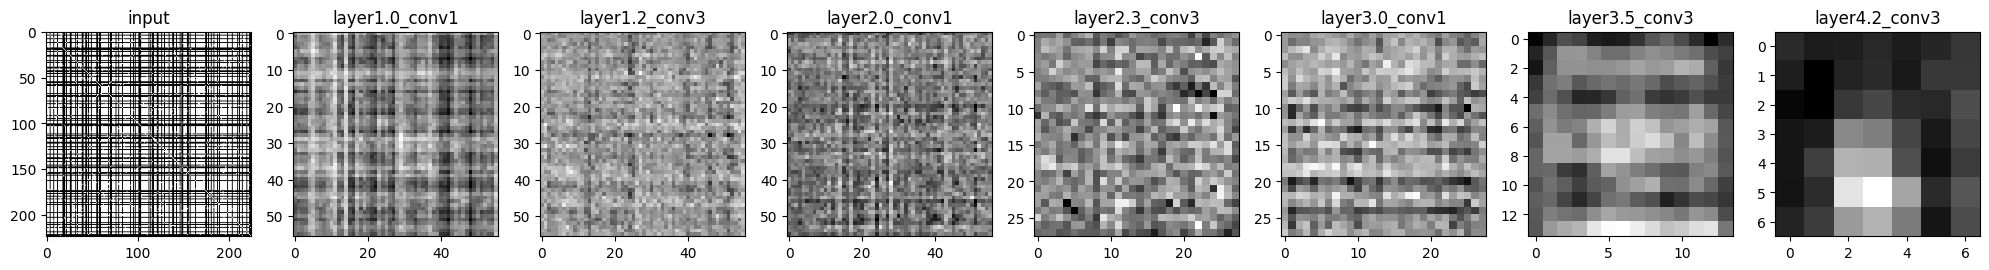

In [4]:
# Testing the function:
# - Define model name:
model_name = "ResNet50scratch" # CHANGE THIS TO TEST OTHER MODELS
# Call the function:
visualize_features(model_name)